# FINAL PROJECT

Name: MUSA T GANIYU

SCHOOL: CUNY SCHOOL OF PROFESSIONAL STUDIES

COURSE: DATA 620 (WEB ANALYTICS)

SEMESTER: SUMMER(2017)

# Project Description:

In this project, we will do analysis on two main themes of the course(network analysis and text processing). We will do the following:

* Obtain the summary statistics of datasets

* Plot (graphical representation of the datasets)

* Find the similarities and differencies of the datasets.

* Test of hypothesis

* Recommender Systems.

* Data cleaning.

* Prediction etc.

# Special Project Requirements:

Final Project 
Your project should incorporate one or both of the two main themes of this course: network analysis and text processing. You need to show all of your work in a coherent workflow, and in a reproducible format, such as an IPython Notebook or an R Markdown document. If you are building a model or models, explain how you evaluate the “goodness” of the chosen model and parameters. 


# Data Sources:

* PART ONE

This dataset is bipartite network contains one million movie ratings from http://movielens.umn.edu/. Left nodes are users and right nodes are movies. An edge between a user and a movie shows that the user has rated the movie.

http://konect.uni-koblenz.de/networks/movielens-1m

* PART TWO

This dataset consists of movie reviews from amazon. The data span a period of more than 10 years, including all ~8 million reviews up to October 2012. Reviews include product and user information, ratings, and a plaintext review. We also have reviews from all other Amazon categories. 

https://snap.stanford.edu/data/web-Movies.html

# PART 1

In [150]:
rm(list =ls())

In [151]:
suppressMessages(library(randomForest))
suppressMessages(library(magrittr))
suppressMessages(library(reshape2))
suppressMessages(library(recommenderlab))
suppressMessages(library(tidyr))
suppressWarnings(library(ggplot2))
suppressMessages(library(ggraph))
suppressMessages(library(tidygraph))
suppressMessages(library(igraph))
suppressMessages(library(dplyr))
suppressMessages(library(knitr))

In [152]:

movies <- read.csv("https://raw.githubusercontent.com/mascotinme/GitHub/master/movielens-1m.edges", sep=",",header = F,as.is=F,skip=1, nrows=1000, col.names=c("id", "from", "to", "weighted"))

kable(head(movies))
dim(movies)
str(movies)



| id| from| to|  weighted|
|--:|----:|--:|---------:|
|  1|    1|  5| 978300760|
|  1|    2|  3| 978302109|
|  1|    3|  3| 978301968|
|  1|    4|  4| 978300275|
|  1|    5|  5| 978824291|
|  1|    6|  3| 978302268|

[1] 1000    4

'data.frame':	1000 obs. of  4 variables:
 $ id      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ from    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ to      : int  5 3 3 4 5 3 5 5 4 4 ...
 $ weighted: int  978300760 978302109 978301968 978300275 978824291 978302268 978302039 978300719 978302268 978301368 ...


In [153]:

df <- as_tbl_graph(movies) # Conversion of movies dataset to graph dataset
df

# A tbl_graph: 670 nodes and 1000 edges
#
# A directed multigraph with 1 component
#
# Node Data: 670 x 1 (active)
   name
  <chr>
1     1
2     2
3     3
4     4
5     5
6     6
# ... with 664 more rows
#
# Edge Data: 1,000 x 4
   from    to    id  weighted
  <int> <int> <int>     <int>
1     1     5     1 978300760
2     2     3     1 978302109
3     3     3     1 978301968
# ... with 997 more rows

# GRAPHICAL REPRESENATIONS

We will sample some rows (500 to be precise) to better graphical represenation. 

In [154]:
set.seed(123)
samp <- sample_n(movies, 500, replace = TRUE)
df2 <- as_tbl_graph(samp)

* Plot with KK as layout.

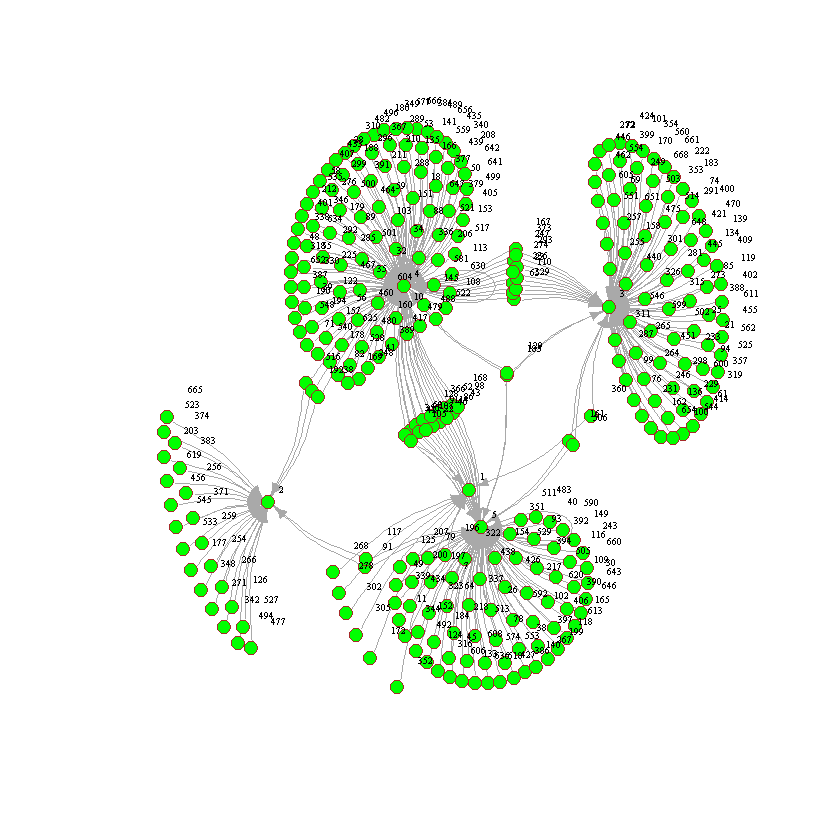

In [155]:
plot(df2, edge.arrow.size=.5, vertex.color="green", vertex.size=5, layout=layout_with_kk,
     vertex.frame.color="brown", vertex.label.color="black", 
     vertex.label.cex=0.5, vertex.label.dist=1, edge.curved=0.2)

Plot with lgl as layout

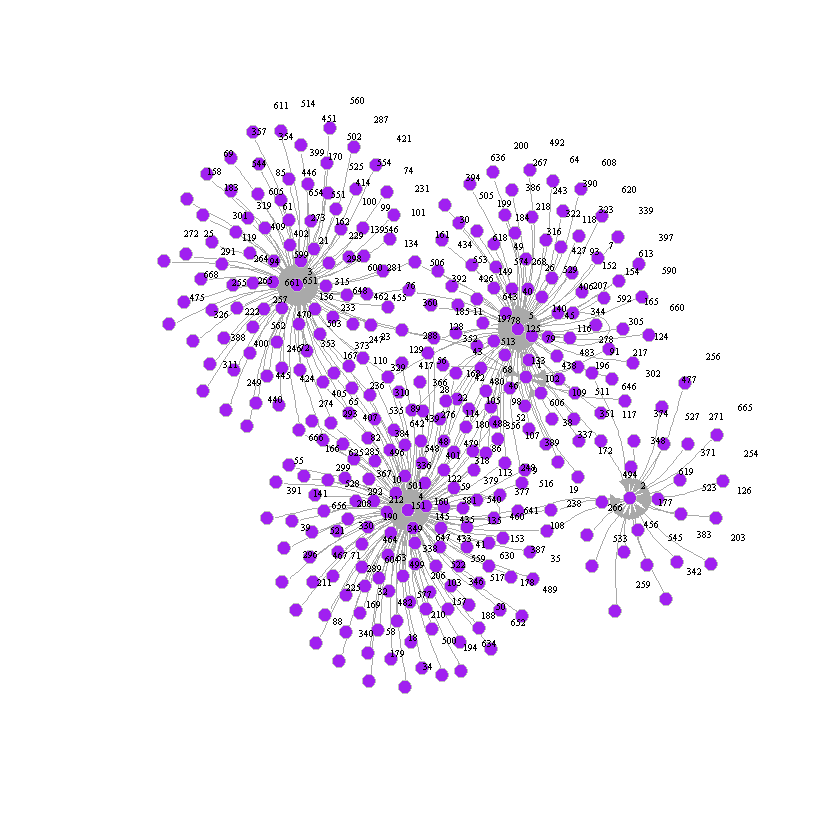

In [156]:
plot(df2, edge.arrow.size=.5, vertex.color="purple", vertex.size=5, layout=layout_with_lgl,
     vertex.frame.color="gray", vertex.label.color="black", 
     vertex.label.cex=0.5, vertex.label.dist=1, edge.curved=0.2)

In [157]:
set.seed(123)

movies[is.na(movies)] <- 0
samp_data <- movies[sample(nrow(movies)),]
samp_sub<- samp_data[,-c(4)]
train_dat <- subset(samp_sub[1:800, ]) #80 percent
test_dat <- subset(samp_sub[801:1000, ]) #20 percent

In [158]:
str(train_dat)
str(test_dat)

'data.frame':	800 obs. of  3 variables:
 $ id  : int  5 9 5 10 10 1 7 10 7 6 ...
 $ from: int  247 547 348 599 633 46 431 289 190 386 ...
 $ to  : int  3 3 2 3 5 5 4 4 4 5 ...
'data.frame':	200 obs. of  3 variables:
 $ id  : int  5 9 8 1 1 3 9 8 7 6 ...
 $ from: int  340 515 437 10 52 181 528 60 63 419 ...
 $ to  : int  4 3 3 4 4 4 4 3 5 4 ...


In [159]:
df %>% activate(edges) # Getting edges out of the graph

# A tbl_graph: 670 nodes and 1000 edges
#
# A directed multigraph with 1 component
#
# Edge Data: 1,000 x 4 (active)
   from    to    id  weighted
  <int> <int> <int>     <int>
1     1     5     1 978300760
2     2     3     1 978302109
3     3     3     1 978301968
4     4     4     1 978300275
5     5     5     1 978824291
6     6     3     1 978302268
# ... with 994 more rows
#
# Node Data: 670 x 1
   name
  <chr>
1     1
2     2
3     3
# ... with 667 more rows

In [160]:
E(df) # Better way to obtain the edges
mean(E(df))

+ 1000/1000 edges (vertex names):
  [1] 1  ->5 2  ->3 3  ->3 4  ->4 5  ->5 6  ->3 7  ->5 8  ->5 9  ->4 10 ->4
 [11] 11 ->5 12 ->4 13 ->4 14 ->4 15 ->5 16 ->4 17 ->3 18 ->4 19 ->5 20 ->4
 [21] 21 ->3 22 ->3 23 ->5 24 ->5 25 ->3 26 ->5 27 ->4 28 ->4 29 ->4 30 ->3
 [31] 31 ->4 32 ->4 33 ->4 34 ->4 35 ->4 36 ->4 37 ->5 38 ->5 39 ->4 40 ->5
 [41] 41 ->5 42 ->5 43 ->4 44 ->4 45 ->4 46 ->5 47 ->5 48 ->4 49 ->5 50 ->4
 [51] 51 ->4 52 ->4 53 ->4 54 ->5 55 ->4 56 ->4 57 ->3 58 ->4 59 ->4 60 ->5
 [61] 61 ->3 62 ->3 63 ->3 64 ->5 65 ->4 66 ->3 67 ->3 68 ->2 69 ->5 70 ->3
 [71] 71 ->4 72 ->3 19 ->4 73 ->2 74 ->3 75 ->2 76 ->3 77 ->4 78 ->3 79 ->5
 [81] 80 ->3 81 ->5 82 ->4 83 ->2 84 ->4 85 ->5 86 ->5 87 ->4 88 ->5 89 ->4
 [91] 90 ->4 91 ->2 92 ->3 93 ->5 94 ->3 95 ->3 96 ->4 97 ->5 98 ->4 99 ->3
+ ... omitted several edges

[1] 500.5

In [161]:
V(df) # The vertices and it averages
mean(V(df))

+ 670/670 vertices, named:
  [1] 1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18 
 [19] 19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36 
 [37] 37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54 
 [55] 55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72 
 [73] 73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90 
 [91] 91  92  93  94  95  96  97  98  99  100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
[163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
+ ... omitted several vertices

[1] 335.5

* Standard Deviation

 This is used to quantify the amount of variation or dispersion of a set of data values for both nodes and edges.

In [162]:
sd(V(df)) 
sd(E(df))

[1] 193.5566

[1] 288.8194

In [163]:
net <- simplify(df, remove.multiple = F, remove.loops = T) 

edgelist <- as_edgelist(net, names=T)
#as_adjacency_matrix(net, attr="edge")
head(edgelist)

1,5
2,3
6,3
7,5
8,5
9,4


* Degree Centrality is the number of links incident upon a node i.e the number of ties a node has!
$${ C }_{ D }(G)\quad =\quad \frac { \sum _{ i=1 }^{ |v| }{ [{ C }_{ D } } (v*)\quad -\quad { C }_{ D }({ v }_{ i })] }{ H } $$

where H is the maximum value when the graph X is connected to one nodes to which other nodes are connected.

In [164]:
# Degree (number of ties)
summary(degree(df, mode="in"))
centr_degree(df, mode="in", normalized=T)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   1.492   0.000 354.000 

$res
  [1]  24  75 274 354 273   0   0   0   0   0   0   0   0   0   0   0   0   0
 [19]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [37]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [55]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [73]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [91]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[109]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[127]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[145]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[163]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[181]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[199]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[217]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[235]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[253]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[271]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[289]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[307]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[325]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[343]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[361]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[379]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[397]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[415]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[433]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[451]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[469]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[487]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[505]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[523]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[541]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[559]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[577]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[595]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[613]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[631]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[649]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[667]   0   0   0   0

$centralization
[1] 0.526917

$theoretical_max
[1] 448230

* Closeness centrality of a node is the average lenght of the shortest path between the node and all other nodes in the graph. Mathematically expressed as
$$C(x)\quad =\quad \frac { 1 }{ { \Sigma  }_{ y }\quad d(y,x) } $$

where d(y,x) is the distance between vertices x and y.

In [165]:
# Inverse of the node's average geodesic distance to others in the network
summary(closeness(df, mode="all", weights=NA))
# centr_clo(df, mode="all", normalized=T)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0004049 0.0005420 0.0005637 0.0005660 0.0005656 0.0009091 

In [166]:
# Values of the first eigenvector of the graph adjacency matrix
#eigen_centrality(df, directed=T, weights=NA)
#summary(centr_eigen(df, directed=T, normalized=T)) 

In [167]:
mean_distance(df, directed=F)

[1] 2.673672

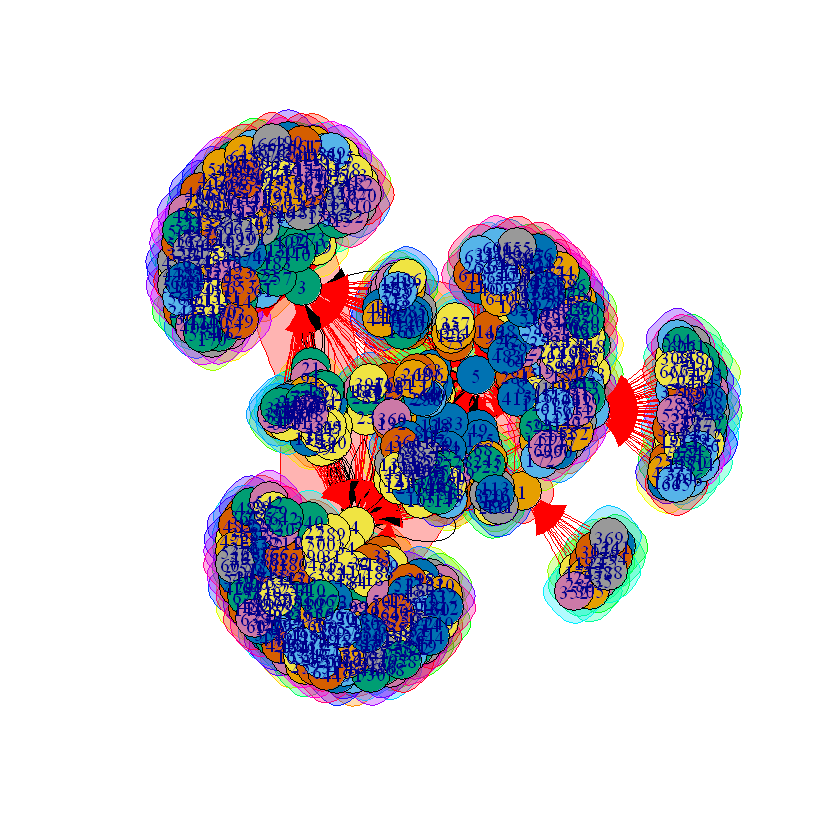

In [168]:
ceb <- cluster_edge_betweenness(df) 
plot(ceb, df)

A correlation analysis test would be done to ascertain if there is any relationship between the variables.

In [169]:
kable(summary(movies))



|   |      id       |     from     |      to      |   weighted       |
|:--|:--------------|:-------------|:-------------|:-----------------|
|   |Min.   : 1.000 |Min.   :  1.0 |Min.   :1.000 |Min.   :978224375 |
|   |1st Qu.: 4.000 |1st Qu.:109.0 |1st Qu.:3.000 |1st Qu.:978229293 |
|   |Median : 6.000 |Median :256.0 |Median :4.000 |Median :978241092 |
|   |Mean   : 6.257 |Mean   :279.9 |Mean   :3.777 |Mean   :978320532 |
|   |3rd Qu.: 9.000 |3rd Qu.:438.0 |3rd Qu.:5.000 |3rd Qu.:978297844 |
|   |Max.   :10.000 |Max.   :670.0 |Max.   :5.000 |Max.   :980638688 |

In [170]:
sd(movies$id)

[1] 2.971495

In [171]:
sd(movies$from)

[1] 193.8241

In [172]:
sd(movies$to)

[1] 1.007117

In [173]:
sd(movies$weighted)


[1] 302427

In [174]:
cor.test(movies$from, movies$to, method = c("pearson", "kendall", "spearman"),
         exact = NULL, conf.level = 0.95, continuity = FALSE)


	Pearson's product-moment correlation

data:  movies$from and movies$to
t = -2.6884, df = 998, p-value = 0.0073
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.14601818 -0.02292005
sample estimates:
        cor 
-0.08479265 


* Regression Analysis

Having obtain a negative correlation between the two variables, we will now dig deeper by doing more statictical analysis that tells us the degree of relationship between them. 

# Test of Hypothesis

Null Hypothesis:

$${ H }_{ 0 }\quad :\quad { \mu  }_{ 1 }\quad =\quad { \mu  }_{ 2 }\quad =\quad { \mu  }_{ 3 }\quad .\quad .\quad .\quad =\quad { \mu  }_{ n }$$

for n levels of an experimental treatment.

$$Against$$

Alternative Hypothesis:

$${ H }_{ 1 }\quad :\quad { \mu  }_{ 1 }\quad \neq \quad { \mu  }_{ 2 }\quad =\quad { \mu  }_{ 3 }\quad .\quad .\quad .\quad =\quad { \mu  }_{ n }$$




* Decision

Reject Ho if P-value is less than tabulated value at ($${\alpha}$$ = 0.05), otherwise do not reject.

In [175]:
reg_analysis <- lm(id ~ ., data=movies)

summary.lm(reg_analysis)


Call:
lm(formula = id ~ ., data = movies)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8211 -1.8299 -0.2725  1.2533  6.6581 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.538e+02  2.420e+02  -2.288   0.0223 *  
from         9.315e-03  3.843e-04  24.242  < 2e-16 ***
to           4.117e-01  7.419e-02   5.549 3.68e-08 ***
weighted     5.682e-07  2.474e-07   2.296   0.0219 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.33 on 996 degrees of freedom
Multiple R-squared:  0.3868,	Adjusted R-squared:  0.3849 
F-statistic: 209.4 on 3 and 996 DF,  p-value: < 2.2e-16


In [176]:
stepwise <- step(reg_analysis, direction = "both")
summary(stepwise)

Start:  AIC=1696.08
id ~ from + to + weighted

           Df Sum of Sq    RSS    AIC
<none>                  5409.1 1696.1
- weighted  1      28.6 5437.7 1699.4
- to        1     167.2 5576.4 1724.5
- from      1    3191.5 8600.6 2157.8



Call:
lm(formula = id ~ from + to + weighted, data = movies)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8211 -1.8299 -0.2725  1.2533  6.6581 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.538e+02  2.420e+02  -2.288   0.0223 *  
from         9.315e-03  3.843e-04  24.242  < 2e-16 ***
to           4.117e-01  7.419e-02   5.549 3.68e-08 ***
weighted     5.682e-07  2.474e-07   2.296   0.0219 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.33 on 996 degrees of freedom
Multiple R-squared:  0.3868,	Adjusted R-squared:  0.3849 
F-statistic: 209.4 on 3 and 996 DF,  p-value: < 2.2e-16


This is the table that shows the output of the ANOVA analysis and whether there is a statistically significant difference between our group means.

In [177]:
anova(reg_analysis, test= "F")

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
from,1,3192.65546,3192.655461,587.875698,1.946391e-102
to,1,190.54626,190.546263,35.086002,4.340074e-09
weighted,1,28.63838,28.638384,5.273294,2.186187e-02
Residuals,996,5409.11089,5.430834,NA,NA


In [178]:
confint(stepwise)

,2.5 %,97.5 %
(Intercept),-1.028679e+03,-7.885766e+01
from,8.560976e-03,1.006905e-02
to,2.661051e-01,5.572618e-01
weighted,8.264442e-08,1.053717e-06


* Tukey Post Hoc Test

A further investigation using tukey test.

In [179]:
summary(tuk <- aov(id~., data = movies))

             Df Sum Sq Mean Sq F value   Pr(>F)    
from          1   3193    3193 587.876  < 2e-16 ***
to            1    191     191  35.086 4.34e-09 ***
weighted      1     29      29   5.273   0.0219 *  
Residuals   996   5409       5                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

* Conclusion:

From the above analysis, we can deduce that:

+ The P-value is less than the tabulated value (0.05).

+ The Correlation Co-efficient is weak negative.

+ The Confident Interval of stepwise best model selection is Non-Zero.

+ The TukeyHD Post Adhoc output support the initial Analysis of Variance outcome.

We can therefore conclude that there was statistically difference between their means and the null hypothesis is rejected.




# Recommender System

* We will do a little analysis on the movies dataset recommender system.

In [180]:
mov_rrm <- as(movies, "realRatingMatrix") # Conversion of the dataset into Real Rating Matrix

In [181]:
# sampling out some real rating matrix for further analysis.
movies_ratings <- sample(mov_rrm[rowCounts(mov_rrm) >50,], 100, replace=TRUE)
movies_ratings

100 x 670 rating matrix of class 'realRatingMatrix' with 12403 ratings.

In [182]:
eval_scheme <- evaluationScheme(movies_ratings, method="bootstrap",
        train = 0.9, k=1, given=3, goodRating=3)

In [183]:
eval_recomm <- Recommender(data = getData(eval_scheme, "train"),method = "IBCF", parameter = NULL)

In [184]:
# Prediction of the recommended ratings
eval_prediction <- predict(object = eval_recomm, newdata =getData(eval_scheme, "known"), n = 10, type = "ratings")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


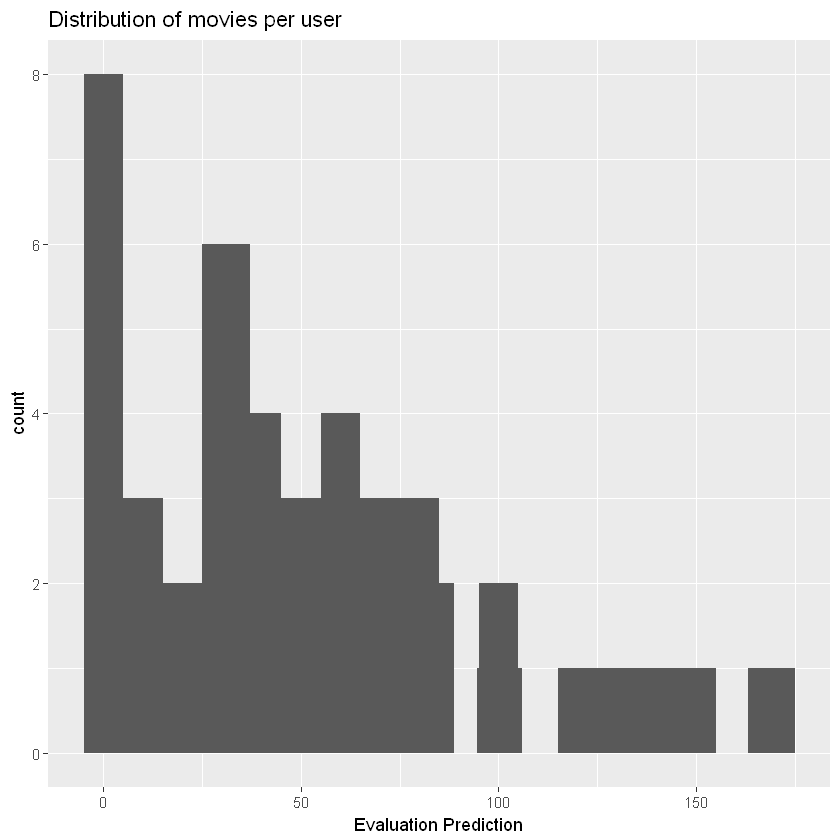

In [185]:
qplot(rowCounts(eval_prediction)) + geom_histogram(binwidth = 10) + ggtitle("Distribution of movies per user") + xlab("Evaluation Prediction")

In [186]:
eval_pred_accuracy <- calcPredictionAccuracy(x = eval_prediction, data = getData(eval_scheme, "unknown"), byUser =TRUE)
output <- evaluate(x = eval_scheme, method = "IBCF", n =seq(10, 100, 10))

IBCF run fold/sample [model time/prediction time]
	 1  [3.6sec/0.02sec] 


* Root Mean Square Error (RMSE): This is frequently used measure of the differences between values (sample and population values) predicted by a model or an estimator and the values actually observed. i.e used to measure the standard deviation between the real and predicted values.


* Mean Sqaure Error (MSE): This being a risk fuction is used to measures the average of the squares of the errors or deviations-that is, the difference between the mean of an estimator and what is estimated.


* Mean Absolute Error (MAE): As the name implies, it is the mean of absolute different between estimator and what is estimated.

In [187]:
kable(head(eval_pred_accuracy))



|   |      RMSE|       MSE|       MAE|
|:--|---------:|---------:|---------:|
|3  | 1.1335640| 1.2849673| 0.9701512|
|10 | 0.8240958| 0.6791339| 0.6811024|
|6  | 1.5399443| 2.3714286| 1.2285714|
|5  | 2.1011031| 4.4146341| 2.0731707|
|10 | 0.8164966| 0.6666667| 0.6666667|
|8  | 0.5449163| 0.2969338| 0.2491489|

* A confusion matrix is a table that is often used to describe the performance of a classification model (classifier) on a set of test data for which the true values are known.

Where,

TP = TRUE POSITIVE

FP = FALSE POSITIVE

FN = FALSE NEGATIVE

TN = TRUE NEGATIVE

In [188]:
kable(head(getConfusionMatrix(output)[1]))



|    |        TP|       FP|        FN|       TN| precision|    recall|       TPR|       FPR|
|:---|---------:|--------:|---------:|--------:|---------:|---------:|---------:|---------:|
|10  |  5.302326| 2.953488| 107.37209| 551.3721| 0.6378378| 0.0553383| 0.0553383| 0.0052881|
|20  | 10.837209| 5.023256| 101.83721| 549.3023| 0.6824324| 0.1172239| 0.1172239| 0.0090075|
|30  | 16.674419| 6.232558|  96.00000| 548.0930| 0.7216921| 0.1833869| 0.1833869| 0.0112194|
|40  | 21.511628| 7.255814|  91.16279| 547.0698| 0.7352084| 0.2317985| 0.2317985| 0.0131552|
|50  | 25.604651| 7.906977|  87.06977| 546.4186| 0.7446537| 0.2661681| 0.2661681| 0.0144125|
|60  | 29.232558| 8.441861|  83.44186| 545.8837| 0.7497892| 0.2956368| 0.2956368| 0.0154536|
|70  | 32.139535| 8.674419|  80.53488| 545.6512| 0.7531112| 0.3170307| 0.3170307| 0.0158933|
|80  | 34.372093| 8.860465|  78.30233| 545.4651| 0.7547843| 0.3323530| 0.3323530| 0.0162453|
|90  | 36.093023| 8.976744|  76.58140| 545.3488| 0.7564845| 0.343140

* What about ROC Curve?

This curve used graph that summarizes the performance of a classifier over all possible thresholds.

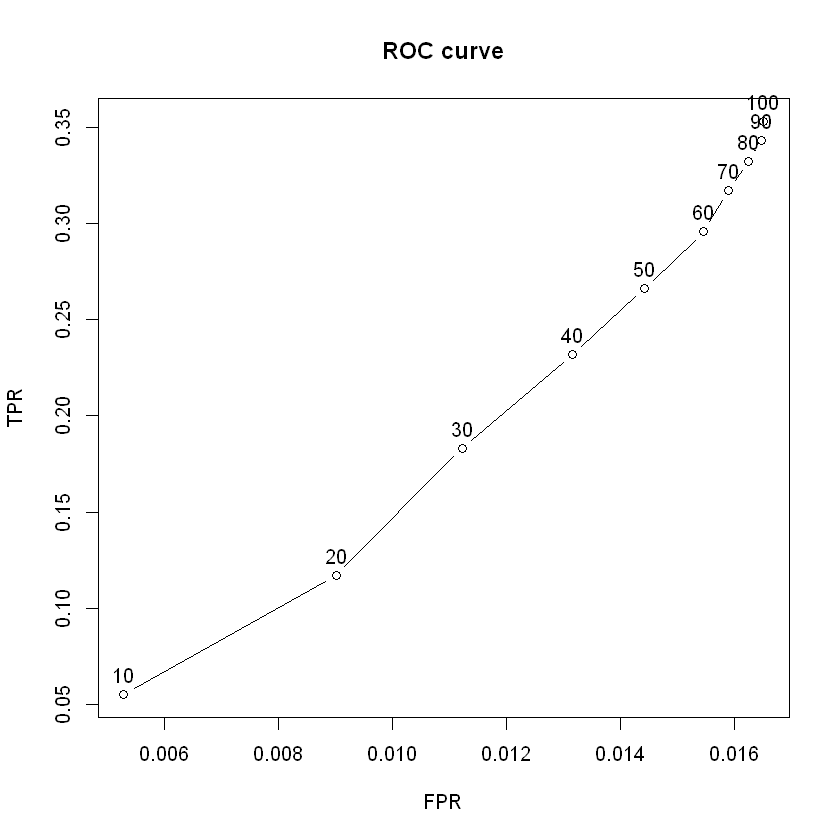

In [189]:
plot(output, annotate = TRUE, main = "ROC curve")

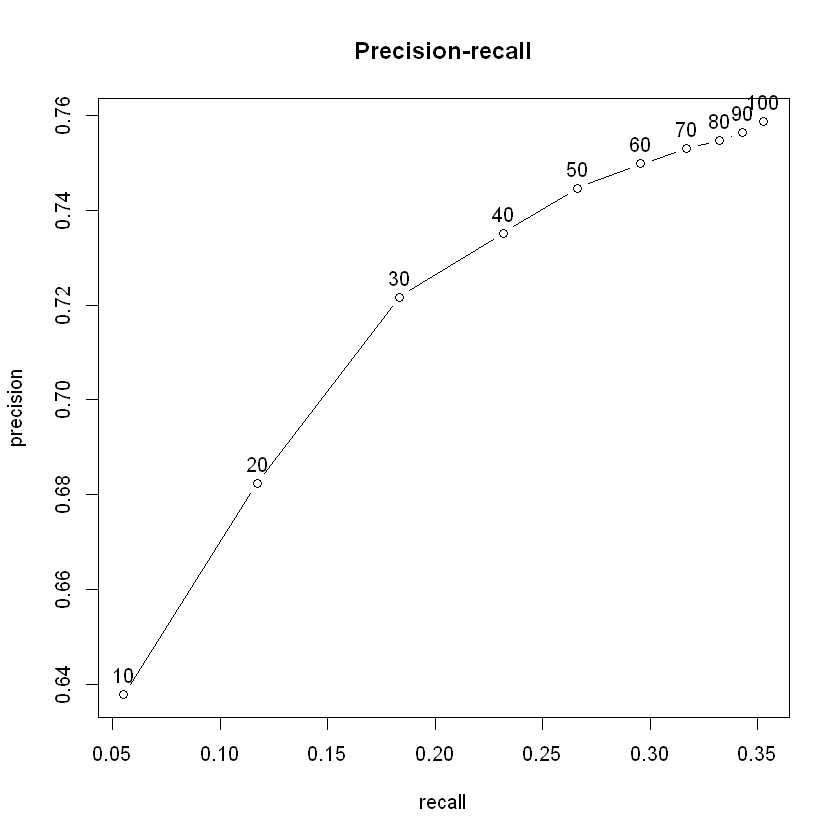

In [190]:
plot(output, "prec/rec", annotate = TRUE, main = "Precision-recall")

# PART 2

In [191]:
rm(list =ls())

In this part, we will make use of text files. These files are text from movies reviews  which are either positive or negative reviews.

In [217]:
# Kindly load this libraries.

options(warn = -1)
suppressMessages(library(tm))
suppressMessages(library(tidyr))
suppressMessages(library(stringr))
suppressMessages(library(dplyr))
suppressMessages(library(rpart))
suppressMessages(library(SnowballC))
suppressMessages(library(knitr))
suppressMessages(require(RTextTools))
suppressMessages(require(e1071))
suppressMessages(library(nnet))
suppressMessages(library(wordcloud));

Below are links to the text files.

* KEYS:


+ url2 leads to general movies reviews text.

+ url3 leads to first negative reviews text.

+ url3_2 leads to second negative reviews text.

+ url4 leads to first positive reviews text.

+ url4_2 leads to second positive reviews text

In [193]:


url2 <- "https://raw.githubusercontent.com/mascotinme/MSDA-620/master/movies_reviews.txt"

url3 <- "https://raw.githubusercontent.com/mascotinme/MSDA-620/master/negative/cv000_29416.txt"
url3_2 <- "https://raw.githubusercontent.com/mascotinme/MSDA-620/45bfb087d150d0511c84c055ee98cbdaee3ad030/negative/cv003_12683.txt"

url4 <- "https://raw.githubusercontent.com/mascotinme/MSDA-620/45bfb087d150d0511c84c055ee98cbdaee3ad030/positive/cv001_18431.txt"
url4_2 <- "https://raw.githubusercontent.com/mascotinme/MSDA-620/45bfb087d150d0511c84c055ee98cbdaee3ad030/positive/cv002_15918.txt"


In [194]:
# Load files into R environment.

rev <- readLines(url2)

neg <- readLines(url3)
neg_2 <- readLines(url3_2)

pos <- readLines(url4)
pos_2 <- readLines(url4_2)#Load the text file and obtain the head and class

head(rev)
print("......................................The above text is head of  rev review........................................")

neg <- paste(neg_2, neg, colapse =" ")
head(neg)
print("...................................... The Above text is head of negative review...................................")
class(neg)


pos <- paste(pos_2, pos, colapse =" ")
head(pos)
print("...................................... The Above text is head of Positive review...................................")



[1] "Hitcher, The (1986)"                                                                                                                                                                                                                                                                                          
[2] "reviewed by"                                                                                                                                                                                                                                                                                                  
[3] "Mark R. Leeper"                                                                                                                                                                                                                                                                                               
[4] ""                                                                                                                                                                                                                                                                                                             
[5] "[Editor's note: Sites running 2.10 netnews will munge headers of articles in moderated groups *not* named mod.something. If you get my name instead of Mark Leeper's in the \"From:\" line, please encourage your S.A. and your feed's S.A. to upgrade to 2.11. Thank you. And now, on to our review... -ecl]"
[6] ""

[1] "......................................The above text is head of  rev review........................................"


[1] " \" quest for camelot \" is warner bros . ' first feature-length , fully-animated attempt to steal clout from disney's cartoon empire , but the mouse has no reason to be worried .  plot : two teen couples go to a church party , drink and then drive .   "                                                                                                                                                   
[2] "the only other recent challenger to their throne was last fall's promising , if flawed , 20th century fox production \" anastasia , \" but disney's \" hercules , \" with its lively cast and colorful palate , had her beat hands-down when it came time to crown 1997's best piece of animation .  they get into an accident .   "                                                                             
[3] "this year , it's no contest , as \" quest for camelot \" is pretty much dead on arrival .  one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares .   "                                                                                                                                                                                                                 
[4] "even the magic kingdom at its most mediocre -- that'd be \" pocahontas \" for those of you keeping score -- isn't nearly as dull as this .  what's the deal ?   "                                                                                                                                                                                                                                                
[5] "the story revolves around the adventures of free-spirited kayley ( voiced by jessalyn gilsig ) , the early-teen daughter of a belated knight from king arthur's round table .  watch the movie and \" sorta \" find out . . .   "                                                                                                                                                                                
[6] "kayley's only dream is to follow in her father's footsteps , and she gets her chance when evil warlord ruber ( gary oldman ) , an ex-round table member-gone-bad , steals arthur's magical sword excalibur and accidentally loses it in a dangerous , booby-trapped forest .  critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package .   "

[1] "...................................... The Above text is head of negative review..................................."


[1] "character"

[1] "you've got mail works alot better than it deserves to .  every now and then a movie comes along from a suspect studio , with every indication that it will be a stinker , and to everybody's surprise ( perhaps even the studio ) the film becomes a critical darling .   "                                            
[2] "in order to make the film a success , all they had to do was cast two extremely popular and attractive stars , have them share the screen for about two hours and then collect the profits .  mtv films' _election , a high school comedy starring matthew broderick and reese witherspoon , is a current example .   "
[3] "no real acting was involved and there is not an original or inventive bone in it's body ( it's basically a complete re-shoot of the shop around the corner , only adding a few modern twists ) .  did anybody know this film existed a week before it opened ?   "                                                     
[4] "essentially , it goes against and defies all concepts of good contemporary filmmaking .  the plot is deceptively simple .   "                                                                                                                                                                                          
[5] "it's overly sentimental and at times terribly mushy , not to mention very manipulative .  george washington carver high school is having student elections .   "                                                                                                                                                       
[6] "but oh , how enjoyable that manipulation is .  tracy flick ( reese witherspoon ) is an over-achiever with her hand raised at nearly every question , way , way , high .   "

[1] "...................................... The Above text is head of Positive review..................................."


# DATA CLEANING

Here, we will remove all the unwanted characters/alphabets in all the texts.

In [195]:
# Negative text file

neg = gsub("[[:punct:]]", "", neg)
neg = gsub("[[:digit:]]", "", neg)
neg = gsub("ï", "", neg)
neg = gsub("[ \t]{2,}", "", neg)
neg = gsub("\tby", "", neg)
neg = gsub("\tfor", "", neg)
neg = gsub("zzzz", "", neg)
neg = gsub("[[,:digit:]]", "", neg)


In [196]:
# Positive text file

pos = gsub("[[:punct:]]", "", pos)
pos = gsub("[[:digit:]]", "", pos)
pos = gsub("ï", "", pos)
pos = gsub("[ \t]{2,}", "", pos)
pos = gsub("\tby", "", pos)
pos = gsub("\tfor", "", pos)
pos = gsub("zzzz", "", pos)
pos = gsub("[[,:digit:]]", "", pos)


In [197]:
# General reviews text file

rev = gsub("[[:punct:]]", "", rev)
rev = gsub("[[:digit:]]", "", rev)
#rev = gsub("ï", "", rev)
rev = gsub("[ \t]{2,}", "", rev)
rev = gsub("\tby", "", rev)
rev = gsub("\tfor", "", rev)
rev = gsub("zzzz", "", rev)
rev = gsub("[[,:digit:]]", "", rev)


Conversion of all the text files into Corpus.

In [198]:
neg_corpus = Corpus(VectorSource(neg)) 

In [199]:
pos_corpus = Corpus(VectorSource(pos))

In [200]:
rev_corpus = Corpus(VectorSource(rev))

* Negative Corpus cleaning.

In [201]:
neg_corpus = tm_map(neg_corpus, content_transformer(tolower)) # To lower case
neg_corpus = tm_map(neg_corpus, removeNumbers) # Numeric removal
neg_corpus = tm_map(neg_corpus, removePunctuation) # removing punctuations
neg_corpus = tm_map(neg_corpus, removeWords, c("the", "and", stopwords("english"))) # Removing some conjuctions
neg_corpus = tm_map(neg_corpus, stripWhitespace) # Removing white space

inspect(neg_corpus[1]) # Inspection

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1

[1] quest camelotis warner brosfirst featurelengthfullyanimated attempt steal clout disneys cartoon empirebut mouse reason worriedplottwo teen couples go church partydrink drive


* Posittive Corpus cleaning.

In [202]:
pos_corpus = tm_map(pos_corpus, content_transformer(tolower))
pos_corpus = tm_map(pos_corpus, removeNumbers)
pos_corpus = tm_map(pos_corpus, removePunctuation)
pos_corpus = tm_map(pos_corpus, removeWords, c("the", "and", stopwords("english")))
pos_corpus = tm_map(pos_corpus, stripWhitespace)

inspect(pos_corpus[1])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1

[1] youve got mail works alot better deserves toevery now movie comes along suspect studiowith every indication will stinkerand everybodys surpriseperhaps even studiothe film becomes critical darling


* General reviews Corpus cleaning.

In [203]:
rev_corpus = tm_map(rev_corpus, content_transformer(tolower))
rev_corpus = tm_map(rev_corpus, removeNumbers)
rev_corpus = tm_map(rev_corpus, removePunctuation)
rev_corpus = tm_map(rev_corpus, removeWords, c("the", "and", stopwords("english")))
rev_corpus = tm_map(rev_corpus, stripWhitespace)

The next step is the conversion to Document Term Matrix and to also remove the Sparse Terms.

* NB: This will be done to the remaining files too.

In [204]:
neg_dtm <- DocumentTermMatrix(neg_corpus) # Converting to Matrix Document
neg_dtm

<<DocumentTermMatrix (documents: 35, terms: 483)>>
Non-/sparse entries: 763/16142
Sparsity           : 95%
Maximal term length: 26
Weighting          : term frequency (tf)

In [205]:
neg_dtm = removeSparseTerms(neg_dtm, 0.99)
neg_dtm

<<DocumentTermMatrix (documents: 35, terms: 483)>>
Non-/sparse entries: 763/16142
Sparsity           : 95%
Maximal term length: 26
Weighting          : term frequency (tf)

* We can then inspects them!

In [206]:
inspect(neg_dtm[, ])

<<DocumentTermMatrix (documents: 35, terms: 483)>>
Non-/sparse entries: 763/16142
Sparsity           : 95%
Maximal term length: 26
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs arthurs camelotis even film just movie much one pretty see
  12       0         0    1    1    0     0    1   1      0   1
  17       0         0    0    1    0     0    1   1      0   0
  18       0         0    0    0    0     0    0   0      0   0
  21       0         0    0    0    0     0    0   0      0   0
  25       1         0    0    0    0     1    0   0      1   0
  26       1         0    0    0    2     0    0   0      1   0
  28       0         0    0    1    0     0    0   0      2   1
  35       0         0    0    0    0     0    0   0      0   0
  6        1         0    0    0    0     1    0   0      0   0
  7        1         0    1    0    2     0    0   2      0   0


Here, we will obtain the frequencies of term(s) that come often.

In [207]:
findFreqTerms(neg_dtm, 1:20)

[1] "attempt"                 "brosfirst"              
 [3] "camelotis"               "animationthey"          
 [5] "beat"                    "promisingif"            
 [7] "recent"                  "even"                   
 [9] "keeping"                 "knight"                 
[11] "movie"                   "gets"                   
[13] "correctly"               "didnt"                  
[15] "makes"                   "climb"                  
[17] "differentiatesquestfrom" "main"                   
[19] "ogre"                    "can"                    
[21] "characters"              "stinknone"              
[23] "unravel"                 "shows"                  
[25] "shtick"                  "actors"                 
[27] "celine"                  "thing"                  
[29] "voice"                   "strain"                 
[31] "strangeness"             "password"               
[33] "visions"                 "took"                   
[35] "playing"                 "footageoverallthe"      
[37] "also"                    "othersstir"

A word cloud of the words. Isn't it beautiful?

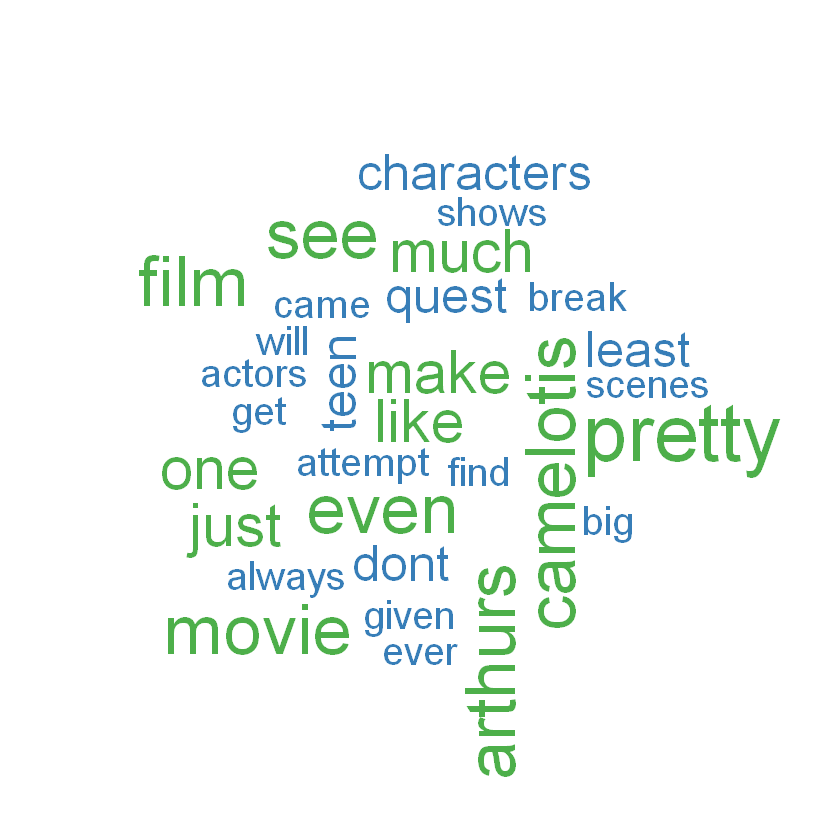

In [208]:
neg_freq = data.frame(sort(colSums(as.matrix(neg_dtm)), decreasing=TRUE))
wordcloud(rownames(neg_freq), neg_freq[,], max.words=1000, colors=brewer.pal(1, "Set1"))

We are going to do what we did to negative reviews to positive reviews too.

In [209]:
pos_dtm <- DocumentTermMatrix(pos_corpus) # Converting to Matrix Document
pos_dtm

<<DocumentTermMatrix (documents: 39, terms: 455)>>
Non-/sparse entries: 745/17000
Sparsity           : 96%
Maximal term length: 23
Weighting          : term frequency (tf)

In [210]:
pos_dtm = removeSparseTerms(pos_dtm, 0.98)
pos_dtm

<<DocumentTermMatrix (documents: 39, terms: 455)>>
Non-/sparse entries: 745/17000
Sparsity           : 96%
Maximal term length: 23
Weighting          : term frequency (tf)

In [211]:
inspect(pos_dtm[, ])
findFreqTerms(pos_dtm, 1:20)

<<DocumentTermMatrix (documents: 39, terms: 455)>>
Non-/sparse entries: 745/17000
Sparsity           : 96%
Maximal term length: 23
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs better deserves even film got movie school shop two youve
  1       1        1    1    1   1     1      0    0   0     1
  12      0        0    1    0   0     0      0    2   0     0
  18      0        0    0    0   0     1      0    0   0     0
  19      1        0    0    0   0     0      0    0   0     0
  2       0        0    0    1   0     0      1    0   2     0
  22      0        0    0    0   0     0      0    1   0     0
  26      0        0    1    0   0     1      1    0   1     0
  31      0        0    1    0   0     0      0    2   0     0
  37      0        0    0    0   0     1      0    0   0     0
  9       0        0    1    0   1     0      0    0   0     1


[1] "along"             "alot"              "better"           
 [4] "surpriseperhaps"   "order"             "popular"          
 [7] "school"            "corneronly"        "involved"         
[10] "good"              "plot"              "ohhow"            
[13] "studentencourages" "teamingsleepless"  "fact"             
[16] "figured"           "thatbecause"       "yet"              
[19] "live"              "storyline"         "book"             
[22] "kathleen"          "kelleythe"         "likeable"         
[25] "fox"               "kelley"            "neither"          
[28] "number"            "interesting"       "main"             
[31] "doubt"             "drive"             "first"            
[34] "life"              "male"              "formed"           
[37] "jessica"           "revelation"        "ive"              
[40] "climaxas"          "affair"

* Positive Reviews Word Clouds!

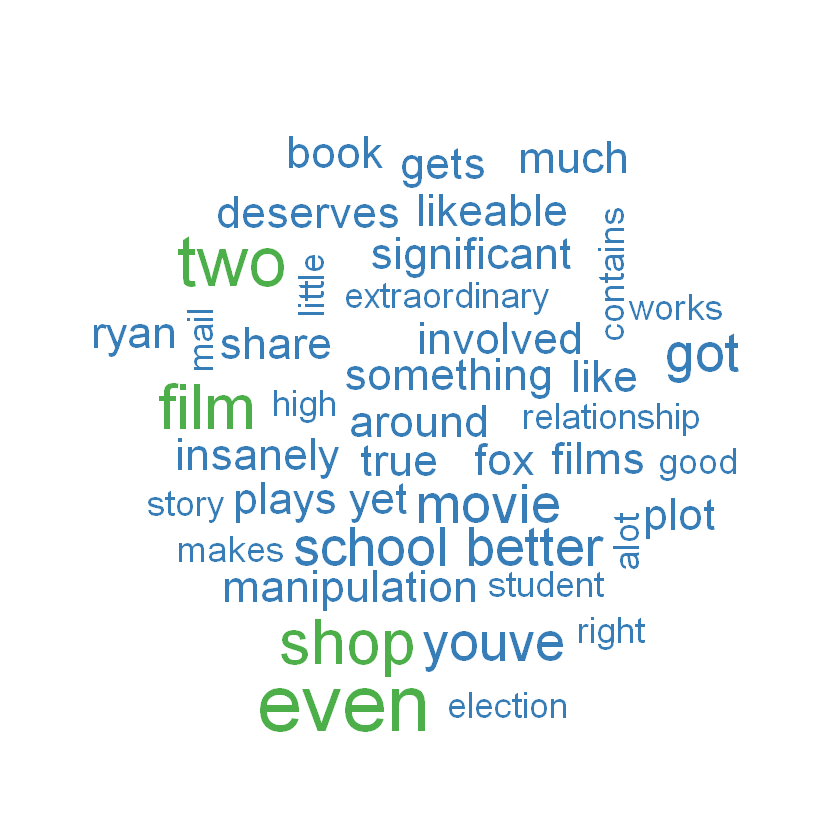

In [212]:
pos_freq = data.frame(sort(colSums(as.matrix(pos_dtm)), decreasing=TRUE))
wordcloud(rownames(pos_freq), pos_freq[,], max.words=1000, colors=brewer.pal(1, "Set1"))

Samething would be done to reviews.

In [213]:
rev_dtm <- DocumentTermMatrix(rev_corpus, list(weighting = weightTfIdf)) # Converting to Matrix Document
rev_dtm

<<DocumentTermMatrix (documents: 172, terms: 950)>>
Non-/sparse entries: 1634/161766
Sparsity           : 99%
Maximal term length: 45
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

In [214]:
rev_dtm = removeSparseTerms(rev_dtm, 0.9999)
rev_dtm

<<DocumentTermMatrix (documents: 172, terms: 950)>>
Non-/sparse entries: 1634/161766
Sparsity           : 99%
Maximal term length: 45
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

In [215]:
findFreqTerms(rev_dtm, 1:20)

[1] "hitcher"                      "reviewed"                    
 [3] "leeper"                       "mark"                        
 [5] "note"                         "review"                      
 [7] "psychotic"                    "mine"                        
 [9] "bladerunner"                  "everything"                  
[11] "bystander"                    "ihnpmtgzzleeper"             
[13] "mtgzzleeperrutgersrutgersedu" "movie"                       
[15] "internetmoriartyflukecom"     "harry"                       
[17] "cut"

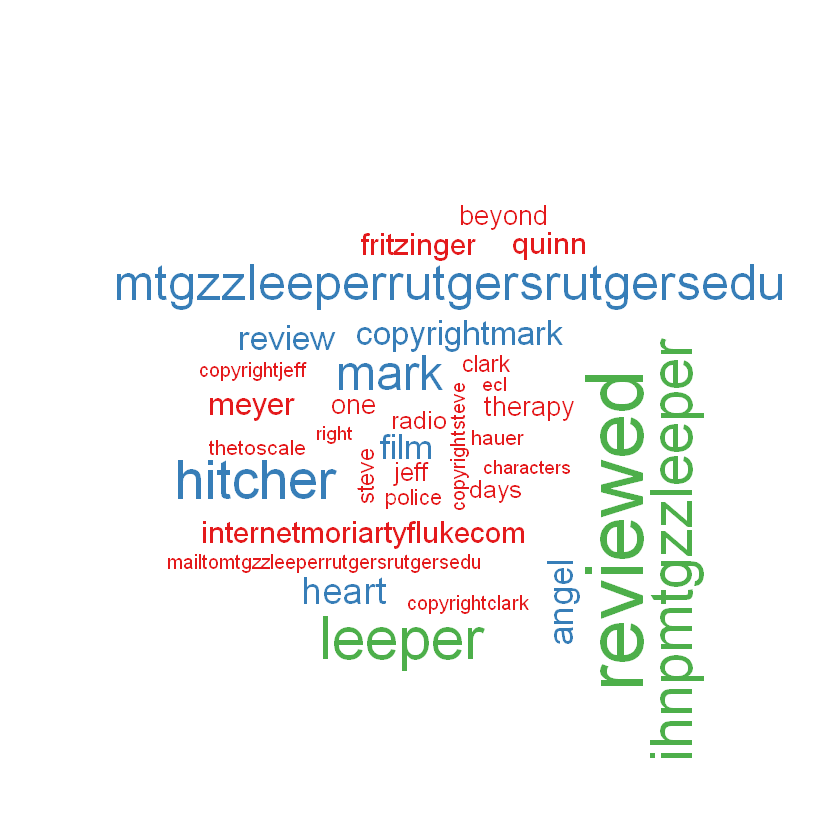

In [216]:
rev_freq = data.frame(sort(colSums(as.matrix(rev_dtm)), decreasing=TRUE))
wordcloud(rownames(rev_freq), rev_freq[,], max.words=1000, colors=brewer.pal(1, "Set1"))